In [ ]:
from google.colab import files
uploaded = files.upload

In [ ]:
import os
print(os.listdir("/content"))

['.config', 'sample_data']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Replace with your actual file path
file_path = "/content/drive/My Drive/data.csv"

# Load dataset
df = pd.read_csv(file_path, encoding="ISO-8859-1")
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.isnull().sum()


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df = df.drop_duplicates()


In [ ]:
df = df.dropna(subset=['CustomerID'])


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [ ]:
df = df[df['Quantity'] > 0]


In [ ]:
df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']
total_revenue = df['TotalRevenue'].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")


Total Revenue: $8,887,208.89


In [ ]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)


Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


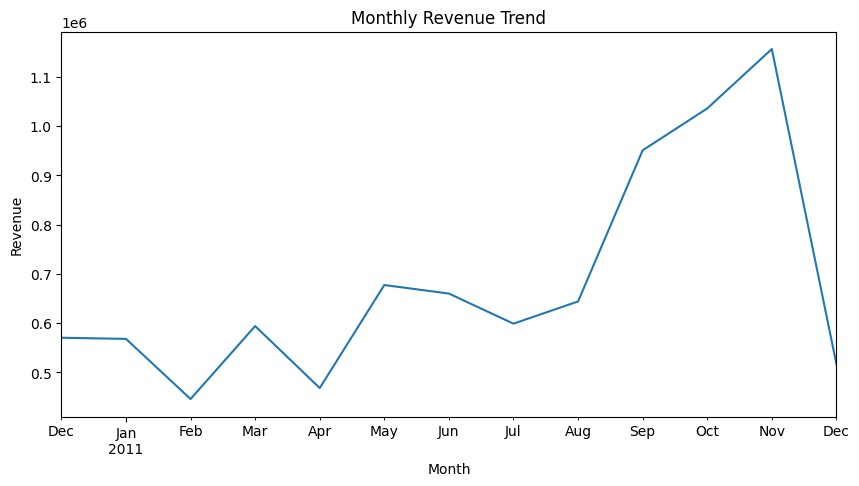

In [ ]:
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['TotalRevenue'].sum()

import matplotlib.pyplot as plt
monthly_sales.plot(kind='line', figsize=(10,5), title='Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()


In [ ]:
top_countries = df.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False).head(5)
print(top_countries)


Country
United Kingdom    7285024.644
Netherlands        285446.340
EIRE               265262.460
Germany            228678.400
France             208934.310
Name: TotalRevenue, dtype: float64


In [ ]:
top_customers = df.groupby('CustomerID')['TotalRevenue'].sum().sort_values(ascending=False).head(5)
print(top_customers)


CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194390.79
16446.0    168472.50
14911.0    143711.17
Name: TotalRevenue, dtype: float64


<ipython-input-26-1f408e14edb1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="Blues_r")


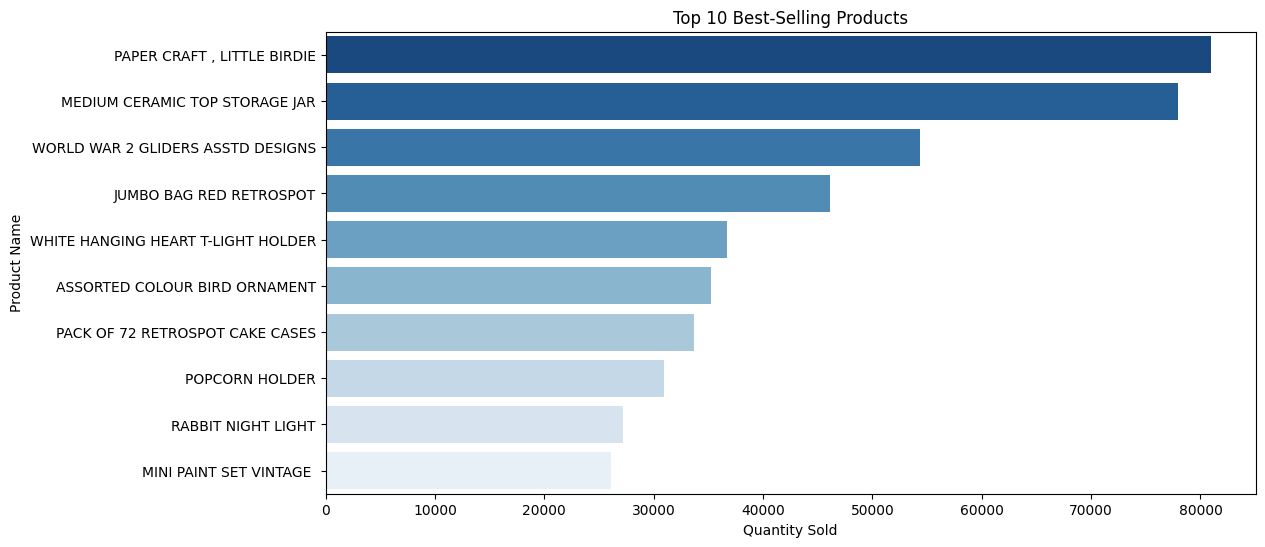

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="Blues_r")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.show()


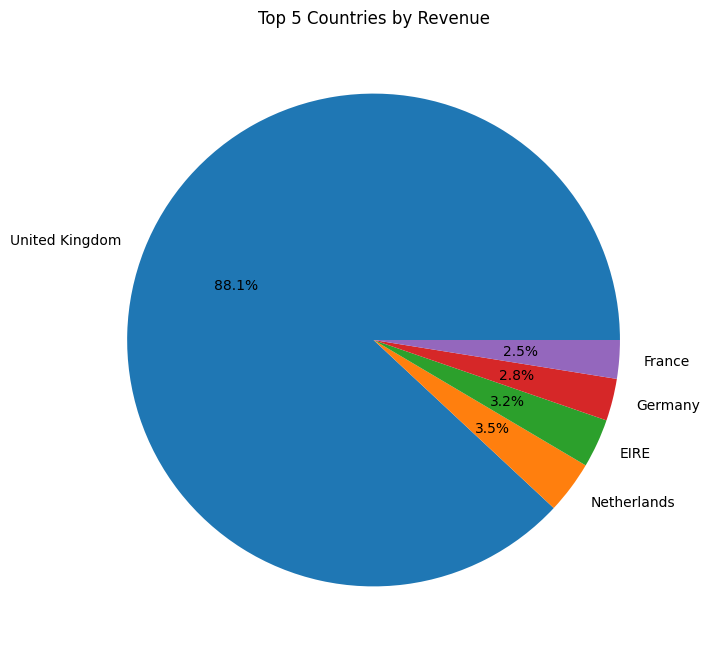

In [ ]:
top_countries.plot(kind="pie", autopct='%1.1f%%', figsize=(8,8), title="Top 5 Countries by Revenue")
plt.ylabel("")
plt.show()


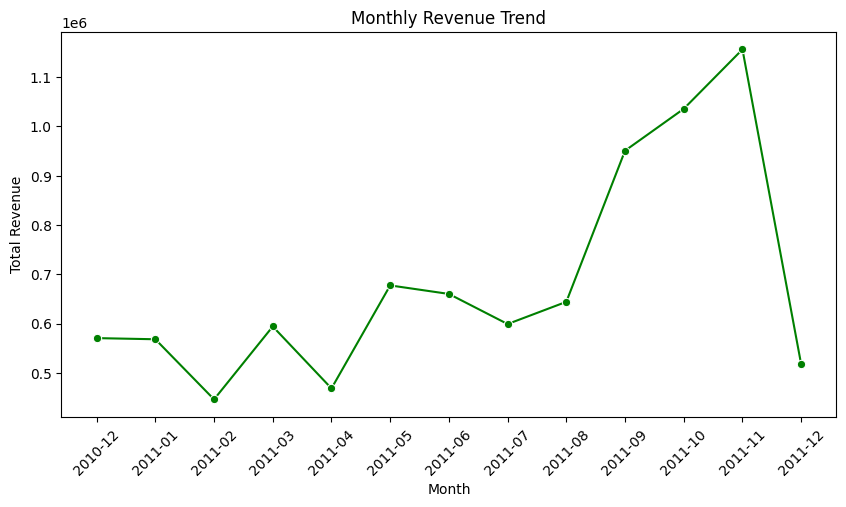

In [ ]:

df['TotalRevenue'] = pd.to_numeric(df['TotalRevenue'], errors='coerce')

df['Month'] = df['Month'].astype(str)

monthly_sales = df.groupby('Month')['TotalRevenue'].sum()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o", color="green")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


In [ ]:
!ls  # Lists all files in the current Colab session


drive  sample_data


In [ ]:
!ls /content


drive  sample_data
